Built A Basic Chatbot using LangGraph

In [1]:
from typing import TypedDict,Annotated
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    messages: Annotated[list,add_messages]


In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [15]:
def chatbot(state: State):
    return {"messages": state["messages"] + [llm.invoke(state["messages"])]}

In [ ]:
graphBuilder = StateGraph(State)

# Adding Nodes
graphBuilder.add_node("nameChatbot", chatbot)

# Adding Edges
graphBuilder.add_edge(START, "nameChatbot")
graphBuilder.add_edge("nameChatbot", END)

# compile graph
graph = graphBuilder.compile()

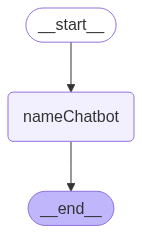

In [10]:
# visulaize graph
from IPython.display import display,Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [17]:
response = graph.invoke({"messages":["Hi"]})
print(response["messages"])

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='952f5ce4-8932-4ad8-b80f-25a505dd6b5c'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--cd2776fd-754b-4bcd-81c8-42884793bb2a-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})]


In [18]:
response["messages"][-1].content

'Hi there! How can I help you today?'

In [21]:
for events in graph.stream({"messages":["Hi, How are you?"]}):
    for value in events.values():
        print(value["messages"][-1].content)

I am doing well, thank you for asking! How are you today?
